# Install Library

In [1]:
!pip3 install underthesea


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip3 install datasets


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip3 install transformers



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
!pip install tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Library



In [144]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import re
from underthesea import word_tokenize


# Load DataSource

In [5]:
class DataSource():
    def __init__(self,file_path):
        self.file_path = file_path
        file_status = open(file_path,'r',encoding='utf-8-sig')
        self.read_file = file_status.readlines()

        target = "data\Hotel\Hotel_target.txt"

        self.read_target =  open(target,'r',encoding='utf-8-sig').readlines()
        self.targets = np.array(list(map(lambda x:x.strip(),self.read_target)))

        self.texts = []
        self.labels = []

        for i in range(1,len(self.read_file),4):
            self.texts.append(self.read_file[i].replace('\n',''))            
            self.labels.append(self.read_file[i+1].replace('\n',''))
        file_status.close()
        
    def getDataFrame(self):
        dummy = [['0' for j in range(len(self.targets)+1)] for i in range(len(self.texts))]

        def TextConverted(text):
                if text == 'neutral':
                    return 1
                elif text == 'negative':
                    return 2
                elif text == 'positive':
                    return 3
                else:
                    return int(0)

        for idx in range(len(self.texts)):
            r = re.findall("#",self.labels[idx])
            temp = self.labels[idx]
            start = 0
            end = len(self.labels[idx])
   
            for i in range(len(r)):
                temp = self.labels[idx][start:end]
                s = temp[re.search("{.*?}",temp).start()+1:re.search("{.*?}",temp).end()-1].split(',')
                aspect = s[0]
                sentiment = s[1][1:]
                arg_aspect = np.argwhere(aspect == self.targets)
                dummy[idx][arg_aspect[0][0]+1] = TextConverted(sentiment)
                start += re.search("{.*?}",temp).end()

        data = pd.DataFrame(dummy,columns=np.append("Sentences",self.targets))
        data['Sentences'] = self.texts
        return data

In [6]:
data = DataSource("data\Hotel\Hotel_train.txt")
df = data.getDataFrame()
df

,Sentences,FACILITIES#CLEANLINESS,FACILITIES#COMFORT,FACILITIES#DESIGN&FEATURES,FACILITIES#GENERAL,FACILITIES#MISCELLANEOUS,FACILITIES#PRICES,FACILITIES#QUALITY,FOOD&DRINKS#MISCELLANEOUS,FOOD&DRINKS#PRICES,...,ROOMS#PRICES,ROOMS#QUALITY,ROOM_AMENITIES#CLEANLINESS,ROOM_AMENITIES#COMFORT,ROOM_AMENITIES#DESIGN&FEATURES,ROOM_AMENITIES#GENERAL,ROOM_AMENITIES#MISCELLANEOUS,ROOM_AMENITIES#PRICES,ROOM_AMENITIES#QUALITY,SERVICE#GENERAL
0,Rộng rãi KS mới nhưng rất vắng. Các dịch vụ ch...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Địa điểm thuận tiện, trong vòng bán kính 1,5km...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Phục vụ, view đẹp, vị trí",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,"thuận tiện , sạch sẽ , vui vẻ hài lòng",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Vị trí đẹp; Có quán bar view đẹp; Nhân viên th...,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Đối diện thung lũng Một kỳ nghỉ tuyệt vời ở Sa...,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2996,Cảm nhận của cá nhân về Sapa View: Phòng ốc đẹ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2997,"Xin chào Chudu24,Xin cám ơn dịch vụ booking củ...",0,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,0,0,3
2998,"Đầu tiên về ưu điểm:- Phòng sạch sẽ, nội thất ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


In [8]:
df_train = pd.read_csv("./data/Hotel/Hotel_train.txt") 
df_dev = pd.read_csv("./data/Hotel/Hotel_dev.txt") 
df_test = pd.read_csv("./data/Hotel/Hotel_test.txt") 


ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 4


In [11]:
TRAIN_PATH = "./data/Hotel/Hotel_train.txt"
DEV_PATH = "./data/Hotel/Hotel_dev.txt"
TEST_PATH = "./data/Hotel/Hotel_test.txt"

In [150]:
df_train.columns[1:]

Index(['RESTAURANT#GENERAL', 'RESTAURANT#PRICES', 'RESTAURANT#MISCELLANEOUS',
       'FOOD#PRICES', 'FOOD#QUALITY', 'FOOD#STYLE&OPTIONS', 'DRINKS#PRICES',
       'DRINKS#QUALITY', 'DRINKS#STYLE&OPTIONS', 'AMBIENCE#GENERAL',
       'SERVICE#GENERAL', 'LOCATION#GENERAL'],
      dtype='object')

In [151]:
for col in df_test.columns[1:]:
  x = df_test.loc[:,col].values
  uni,count = np.unique(x,return_counts = 1)
  print(col)
  for u in range(len(uni)):
    print(uni[u],":",count[u])

RESTAURANT#GENERAL
0 : 277
1 : 5
2 : 13
3 : 205
RESTAURANT#PRICES
0 : 427
1 : 24
2 : 5
3 : 44
RESTAURANT#MISCELLANEOUS
0 : 370
1 : 62
2 : 9
3 : 59
FOOD#PRICES
0 : 169
1 : 175
2 : 28
3 : 128
FOOD#QUALITY
0 : 43
1 : 43
2 : 11
3 : 403
FOOD#STYLE&OPTIONS
0 : 97
1 : 53
2 : 16
3 : 334
DRINKS#PRICES
0 : 424
1 : 45
2 : 3
3 : 28
DRINKS#QUALITY
0 : 429
1 : 11
2 : 6
3 : 54
DRINKS#STYLE&OPTIONS
0 : 454
1 : 4
2 : 1
3 : 41
AMBIENCE#GENERAL
0 : 245
1 : 48
2 : 26
3 : 181
SERVICE#GENERAL
0 : 325
1 : 22
2 : 25
3 : 128
LOCATION#GENERAL
0 : 321
1 : 99
2 : 16
3 : 64


In [13]:
#hugging face
from datasets import load_dataset 

dataset = load_dataset("csv",data_files={"train":TRAIN_PATH,"dev":DEV_PATH,"test":TEST_PATH})
dataset

Using custom data configuration default-7cef7038b243bf41


Failed to read file 'C:\Users\quypr\OneDrive\Desktop\bigdata\data\Hotel\Hotel_train.txt' with error <class 'pandas.errors.ParserError'>: Error tokenizing data. C error: Expected 1 fields in line 3, saw 4



PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:/Users/quypr/.cache/huggingface/datasets/csv/default-7cef7038b243bf41/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317.incomplete\\csv-train-00000-00000-of-NNNNN.arrow'

# Preprocessing Text

In [1]:
vowels_to_ids = {}
vowels_table = [
    ['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a' ],
    ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
    ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
    ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e' ],
    ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
    ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i' ],
    ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o' ],
    ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'o'],
    ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
    ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u' ],
    ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
    ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y' ]
]

for i in range(len(vowels_table)):
    for j in range(len(vowels_table[i]) - 1):
        vowels_to_ids[vowels_table[i][j]] = (i, j)


In [2]:
# nguyên âm chỉ có thể đứng chung với nguyên âm. Một từ không thể có 2 nguyên âm cách nhau bởi 1 phụ âm
def IsValidVietnameseWord(word):
    chars = list(word)
    #nguyen am
    vowel_index = -1
    for i in range(len(chars)):
        idx_vowel_table = vowels_to_ids.get(chars[i],(-1,-1))[0]
        if idx_vowel_table != -1:
            if vowel_index == -1:
                vowel_index = i 
            else:
                if i - vowel_index != 1:
                    return False
                vowel_index = i
    return True

IsValidVietnameseWord("quene")

False

In [3]:
def WordStandardized(word):
    if not IsValidVietnameseWord(word):
        return word

    chars = list(word)
    vowel_indexes = []

    # tìm vị trí nguyên âm
    qu_or_gi = False
    thanh_dieu = 0
    for i in range(len(chars)):
        vowel_table_row, vowel_table_col = vowels_to_ids.get(chars[i],(-1,-1))
        if vowel_table_row == -1 :
            continue
        # qu
        if vowel_table_row == 9:
            if i != 0 and chars[i-1] == 'q':
                chars[i] = 'u'
                qu_or_gi = True
        # gi
        elif vowel_table_row == 5:
            if i != 0 and chars[i-1] == 'g':
                chars[i] = 'i'
                qu_or_gi = True

        # có chứa thanh điệu
        if vowel_table_col != 0:
            thanh_dieu = vowel_table_col
            chars[i] = vowels_table[vowel_table_row][0]

        vowel_indexes.append(i)
    # 1 nguyên âm
    if len(vowel_indexes) == 1:
        c = chars[vowel_indexes[0]]
        chars[vowel_indexes[0]] = vowels_table[vowels_to_ids[c][0]][thanh_dieu]
        return ''.join(chars)

    for idx_vowel in vowel_indexes:
      vowel_table_row, vowel_table_col = vowels_to_ids.get(chars[idx_vowel],(-1,-1))
      #ê, ơ, ô
      if vowel_table_row == 4 or vowel_table_row == 7 or vowel_table_row == 8:
        c = chars[idx_vowel]
        chars[idx_vowel] = vowels_table[vowels_to_ids[c][0]][thanh_dieu]
        return ''.join(chars)

    # kiểm tra qu và gi, 2-3 nguyên âm thì nguyên âm thứ 2 chứa dấu
    if qu_or_gi:
        if len(vowel_indexes) == 2 or len(vowel_indexes) == 3:
            c = chars[vowel_indexes[1]]
            chars[vowel_indexes[1]] = vowels_table[vowels_to_ids[c][0]][thanh_dieu]
        return ''.join(chars)
    
    # 2 nguyên âm
    if len(vowel_indexes) == 2:
        # âm cuối là nguyên âm
        if vowel_indexes[-1] == len(chars) - 1:
            c = chars[vowel_indexes[0]]
            chars[vowel_indexes[0]] = vowels_table[vowels_to_ids[c][0]][thanh_dieu]
        else:
            c = chars[vowel_indexes[-1]]
            chars[vowel_indexes[-1]] = vowels_table[vowels_to_ids[c][0]][thanh_dieu]
        return ''.join(chars)
    
    elif len(vowel_indexes) == 3:
        # âm cuối là nguyên âm
        if vowel_indexes[-1] == len(chars) - 1:
            c = chars[vowel_indexes[1]]
            chars[vowel_indexes[1]] = vowels_table[vowels_to_ids[c][0]][thanh_dieu]
        else:
            c = chars[vowel_indexes[-1]]
            chars[vowel_indexes[-1]] = vowels_table[vowels_to_ids[c][0]][thanh_dieu]
        return ''.join(chars)

    return ''.join(chars)

WordStandardized("chaó")

'cháo'

In [4]:
def TextNormalized(text):

    #Chuyen sang viet thuong
    text = text.lower()
    
    # Chuan hoa emoji va 1 vai tu viet tat
    replace_list = {
    'àk': u' à ', 'aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ', 'ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
    # Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
    "👹": "tiêu cực", "👻": "tích cực", "💃": "tích cực", '🤙': ' tích cực ', '👍': ' tích cực ', '💘': ' tích cực ',
    "💄": "tích cực", "💎": "tích cực", "💩": "tích cực", "😕": "tiêu cực", "😱": "tiêu cực", "😸": "tích cực",
    "😾": "tiêu cực", "🚫": "tiêu cực", "🤬": "tiêu cực", "🧚": "tích cực", "🧡": "tích cực", '🐶': ' tích cực ',
    'kk': 'tích cực',
    '👎': ' tiêu cực ', '😣': ' tiêu cực ', '✨': ' tích cực ', '❣': ' tích cực ', '☀': ' tích cực ',
    '♥': ' tích cực ', '🤩': ' tích cực ', 'like': ' tích cực ', '💌': ' tích cực ',
    '🤣': ' tích cực ', '🖤': ' tích cực ', '🤤': ' tích cực ', ':(': ' tiêu cực ', '😢': ' tiêu cực ',
    '❤': ' tích cực ', '😍': ' tích cực ', '😘': ' tích cực ', '😪': ' tiêu cực ', '😊': ' tích cực ',
    '?': ' ? ', '😁': ' tích cực ', '💖': ' tích cực ', '😟': ' tiêu cực ', '😭': ' tiêu cực ',
    '💯': ' tích cực ', '💗': ' tích cực ', '♡': ' tích cực ', '💜': ' tích cực ', '🤗': ' tích cực ',
    '^^': ' tích cực ', '😨': ' tiêu cực ', '☺': ' tích cực ', '💋': ' tích cực ', '👌': ' tích cực ',
    '😖': ' tiêu cực ', '😀': ' tích cực ', ':((': ' tiêu cực ', '😡': ' tiêu cực ', '😠': ' tiêu cực ',
    '😒': ' tiêu cực ', '🙂': ' tích cực ', '😏': ' tiêu cực ', '😝': ' tích cực ', '😄': ' tích cực ',
    '😙': ' tích cực ', '😤': ' tiêu cực ', '😎': ' tích cực ', '😆': ' tích cực ', '💚': ' tích cực ',
    '✌': ' tích cực ', '💕': ' tích cực ', '😞': ' tiêu cực ', '😓': ' tiêu cực ', '️🆗️': ' tích cực ',
    '😉': ' tích cực ', '😂': ' tích cực ', ':v': '  tích cực ', '=))': '  tích cực ', '😋': ' tích cực ',
    '💓': ' tích cực ', '😐': ' tiêu cực ', ':3': ' tích cực ', '😫': ' tiêu cực ', '😥': ' tiêu cực ',
    '😃': ' tích cực ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' tích cực ', '🤝': ' tích cực ', '🎈': ' tích cực ',
    '😗': ' tích cực ', '🤔': ' tiêu cực ', '😑': ' tiêu cực ', '🔥': ' tiêu cực ', '🙏': ' tiêu cực ',
    '🆗': ' tích cực ', '😻': ' tích cực ', '💙': ' tích cực ', '💟': ' tích cực ',
    '😚': ' tích cực ', '❌': ' tiêu cực ', '👏': ' tích cực ', ';)': ' tích cực ', '<3': ' tích cực ',
    '🌝': ' tích cực ', '🌷': ' tích cực ', '🌸': ' tích cực ', '🌺': ' tích cực ',
    '🌼': ' tích cực ', '🍓': ' tích cực ', '🐅': ' tích cực ', '🐾': ' tích cực ', '👉': ' tích cực ',
    '💐': ' tích cực ', '💞': ' tích cực ', '💥': ' tích cực ', '💪': ' tích cực ',
    '💰': ' tích cực ', '😇': ' tích cực ', '😛': ' tích cực ', '😜': ' tích cực ',
    '🙃': ' tích cực ', '🤑': ' tích cực ', '🤪': ' tích cực ', '☹': ' tiêu cực ', '💀': ' tiêu cực ',
    '😔': ' tiêu cực ', '😧': ' tiêu cực ', '😩': ' tiêu cực ', '😰': ' tiêu cực ', '😳': ' tiêu cực ',
    '😵': ' tiêu cực ', '😶': ' tiêu cực ', '🙁': ' tiêu cực ', '😝': 'tích cực', '😅': ' tiêu cực ',
    '👎🏿': ' tiêu cực ',
    
    # Chuẩn hóa 1 số sentiment words/English words
    ':))': '  tích cực ', ':)': ' tích cực ', '=))': ' tích cực ', '=)': ' tích cực ' ,'ô kêi': ' ok ', 
    'okie': ' ok ', ' o kê ': ' ok ', "^^": ' tích cực ', ' hie ': ' he ', u' êi ': ' đây ', ' nah ': ' nha ',
    u' lúm ': u' lắm ', ' neh ': u' nè ', ' k ': 'không', ' + ': ' tích cực ', ' nc ': ' nước ',
    'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ': ' ok ', ' okay': ' ok ', 'okê': ' ok ',
    ' tks ': u' cám ơn ', ' thks ': u' cám ơn ', ' thanks ': u' cám ơn ', 'ths': u' cám ơn ', ' thank ': u' cám ơn ',
    '⭐': ' star ', '🌟': 'star ', '🎉': u' tích cực ', 
    ' kg  ': u' không ', ' not ': u' không ', u' kg ': u' không ', ' k ': u' không ', ' kh ': u' không ',
    ' kô ': u' không ', ' hok ': u' không ', ' kp ': u' không phải ', u' kô ': u' không ', ' ko ': u' không ',
     'khong': u' không ', u' hok ': u' không ', u' khum ': ' không ',
    u' hôg ': u' không ', 
    ' he he ': ' tích cực ', ' hehe ': ' tích cực ', ' hihi ': ' tích cực ', ' haha ': ' tích cực ', ' hjhj ': ' tích cực ',
    ' lol ': ' tiêu cực ', ' cc ': ' tiêu cực ', ' cute ': u' dễ thương ', ' huhu ': ' tiêu cực ', ' vs ': u' với ',
    ' wa ': ' quá ', ' wá ': u' quá ', ' j ': u' gì ', '“': ' ', ' hã ': ' hả ', u' ứ hự ': ' tích cực ', 
    ' sz ': u' cỡ ', ' size ': u' cỡ ', u' đx ': u' được ', ' dk ': u' được ', ' dc ': u' được ', ' đk ': u' được ',
    ' đc ': u' được ', ' ngon ': ' tích cực ',
     ' thick ': u' tích cực ', ' store ': u' cửa hàng ', ' :* ': ' tích cực ',
    ' shop ': u' cửa hàng ', ' sp ': u' sản phẩm ', ' gud ': u' tốt ', ' god ': u' tốt ', ' wel done ': ' tốt ',
    ' good ': u' tốt ', ' gút ': u' tốt ',
    ' gut ': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', ' perfect ': 'rất tốt',
    ' bt ': u' bình thường ', ' bth ': u' bình thường',
    ' time ': u' thời gian ', ' qá ': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
    ' product ': u' sản phẩm ', ' quality ': u' chất lượng ', ' chat ': u' chất ', ' excelent ': u'hoàn hảo',
    ' bad ': u' tệ ', ' fresh ': u' tươi ', ' sad ': u' tệ ',
    ' date ': u' hạn sử dụng ', ' hsd ': u' hạn sử dụng ', ' quickly ': u' nhanh ', ' quick ': u' nhanh ',
    ' fast ': u' nhanh ', ' delivery ': u' giao hàng ', u' síp ': u' giao hàng ',
    ' beautiful ': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ',
    u' order ': u' đặt hàng ',
    u' chất lg ': u' chất lượng ', u' sd ': u' sử dụng ', u' dt ': u' điện thoại ', u' nt ': u' nhắn tin ',
    u' tl ': u' trả lời ', u' sài ': u' xài ', u' bjo ': u' bao giờ ',
    ' thik ': u' thích ', u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',
    u' quả ng ': u' quảng  ', 'free': 'miễn phí', ' book ': u' đặt ',
    ' dep ': u' đẹp ', u' xau ': u' xấu ', ' delicious ': u' tích cực ', u' hàg ': u' hàng ',
    ' iu ': u' yêu ', ' fake ': u' giả mạo ', ' trl ': 'trả lời', ' >< ': u' tích cực ',
    ' por ': u' tệ ', ' poor ': u' tệ ', ' rep ': u' trả lời ', u' fback ': ' feedback ',
    ' fedback ': ' feedback ', 'nhg': u' nhưng ', u" chẻ ": u" trẻ ", u' nườm nượp ': u' đông ',
    u' toẹt ': u' tuyệt', u' gê ': u' ghê ', u' tẹo ': u' tí ', u' đao ': u' đau ', ' hoy ': u' thôi ', u' lớm ': ' lắm ',
    ' ntn ': u' như thế này ',  ' cx ': ' cũng ', ' tp ': u' thành phố ', ' j ': u' gì ', u' h ': u' giờ ', ' pv ': u' phục vụ ',
    ' kgian ': u' không gian ', ' tgian ': u' thời gian ', u' xiền ': u' tiền ', ' kiu ': u' kêu ', ' ng ': u' người ', 
    u' tềnh ': u' tình ', u' êu ': ' yêu ', ' iu ': u' yêu ', u' qán ': u' quán ', ' zo ' : ' vô ', ' zô  ': ' vô ', ' v ': u' vậy ',

    # dưới 3* quy về 1*, trên 3* quy về 5*
    '6 sao': ' 5star ', '6 star': ' 5star ', '5star': ' 5star ', '5 sao': ' 5star ', '5sao': ' 5star ',
    'starstarstarstarstar': ' 5star ', '1 sao': ' 1star ', '1sao': ' 1star ', '2 sao': ' 1star ', '2sao': ' 1star ',
    '2 starstar': ' 1star ', '1star': ' 1star ', '0 sao': ' 1star ', '0star': ' 1star ', }
    

    # Rút gọn từ kéo dài
    text = re.sub(r'(\w)\1+',r'\1',text)

    # chuẩn hóa icon và các từ viết tắt
    for k,v in replace_list.items():
        text = text.replace(k,v)

    # xóa các emoji dư thừa
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'',text) # no emoji

    # dấu sát từ thì cách ra
    text = re.sub(r'([\.\?\/\\\-\+~`#$%!:\"\;\'\|\{\}\[\],])', r' \1 ',text)

    # xóa _
    text = text.replace('_',' ')
    
    text = text.split()
    # chuẩn hóa thanh điệu
    for i in range(len(text)):
        text[i] = WordStandardized(text[i])
    text = ' '.join(text)

    # xóa kí tự 1 chữ
    text = word_tokenize(text,format = 'text')
    text = text.split()
    for i in range(len(text)):
        if len(text[i]) == 1:
            text[i] = ''

    # xóa kí tự thừa 
    text = ' '.join(text)
    text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬÉÈẺẼẸÊẾỀỂỄỆÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÍÌỈĨỊÚÙỦŨỤƯỨỪỬỮỰÝỲỶỸỴĐ_]', ' ', text)

    # xóa space
    text = re.sub(r"( )\1+",r'\1',text)


    return text


In [7]:
import re

In [10]:
TextNormalized("Qúan có món bò nướng ăn đúng đỉnh, siêu ngonnn 😍😍, nhân viên thân thiện, nhiệt tình")

'quán có món bò nướng ăn đúng đỉnh siêu ngon tích_cực tích_cực nhân_viên thân_thiện nhiệt_tình'

In [5]:
# df['Sentences'] = df['Sentences'].apply(lambda x: TextNormalized(x))

In [158]:
classes = df.columns[1:]

def make_output(df):
    onehot_output = []
    for row in range(df.shape[0]):
        onehot_row = []
        for col in range(1,df.shape[1]):
            sentiment = df.iloc[row,col]
            onehot = []
            if sentiment == 0:
                onehot = [1,0,0,0]
            elif sentiment == 1:
                onehot = [0,1,0,0]
            elif sentiment == 2:
                onehot = [0,0,1,0]
            elif sentiment == 3:
                onehot = [0,0,0,1]
            onehot_row.append(onehot)
        onehot_output.append(onehot_row)
    return np.array(onehot_output,dtype =int)

In [159]:
y_train = make_output(df_train)
y_dev = make_output(df_dev)
y_test = make_output(df_test)


In [160]:
uni, counts = np.unique(df_train.iloc[:,1:].values,return_counts = True)

Text(0.5, 1.0, 'Số lượng các Polarity')

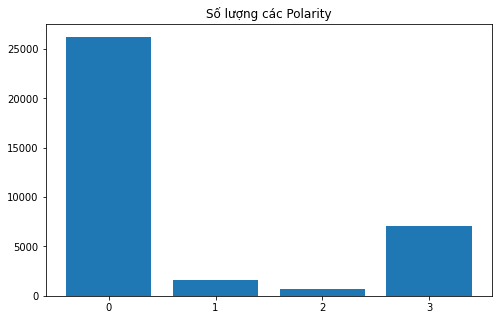

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(x = uni.astype(str),height = counts)
plt.title("Số lượng các Polarity")

In [162]:
cate = {}
for i in range(len(df_train.columns[1:])):
    temp = np.sum(df_train.iloc[:,1:].values[:,i] != 0)
    cate[df_train.columns[i+1]] = temp

Text(0.5, 1.0, 'Biểu đồ phân phối của các Aspect')

<Figure size 1296x1440 with 0 Axes>

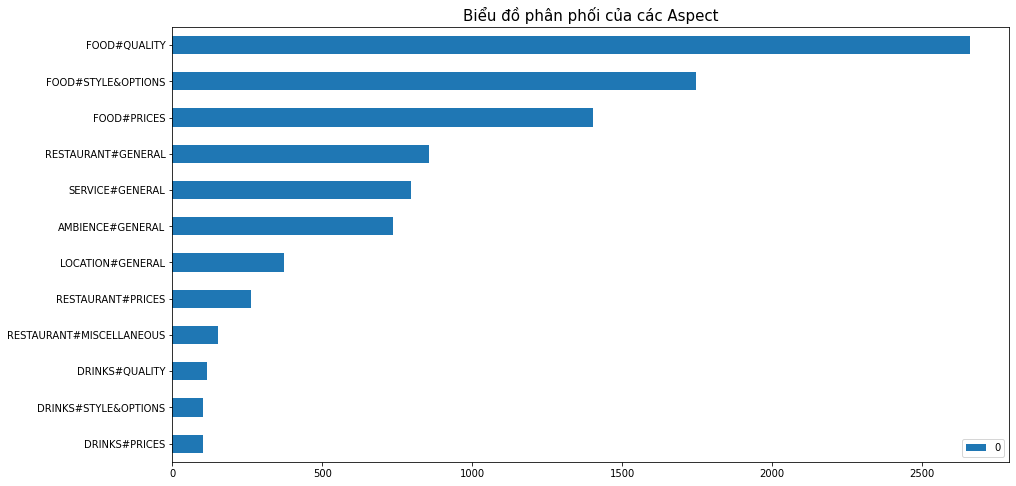

In [163]:
plt.figure(figsize = (18,20))
pd.DataFrame(data = cate,index = [0]).T.sort_values(by = 0).plot(kind = 'barh',figsize=(15,8))
plt.title("Biểu đồ phân phối của các Aspect",fontsize = 15)

=> Aspect và các Polarity không cân bằng

# Embedding + BiLSTM-CNN




## Embedding

In [165]:
f= open('/content/drive/MyDrive/NLP/do an/word2vec_vi_words_100dims.txt','r')
words = []
embedding_words = {}

i = 0
for line in f:
  if i == 0:
    i+= 1
    continue
  value = line.split(' ')
  word = value[0]
  words.append(word)
  try:
    coefs = value[1:]
    embedding_words[word] = np.asarray(coefs,dtype=np.float32)
  except:
    pass


In [166]:
embedding_dim = 100

In [167]:
num_word = len(words)

In [168]:
word2idx = {w:i for i,w in enumerate(words,start = 2)}
word2idx['PAD'] = 0
word2idx['UNK'] = 1

In [169]:
embedding_matrix = np.ones((num_word,embedding_dim))

In [170]:
for w,i in word2idx.items():
  if i > 10000:
    continue
  embedding_vector = embedding_words.get(w)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
  else:
    embedding_matrix[i] = np.random.randn(100)


In [171]:
embedding_matrix

array([[ 5.74881658e-02, -8.54510441e-02,  7.12853372e-02, ...,
        -1.55041525e-02, -9.15896967e-02, -4.40163277e-02],
       [-1.33968771e-01,  7.32150301e-02,  9.38539568e-04, ...,
        -5.94867505e-02,  9.17428359e-02, -6.27832860e-02],
       [-1.34450188e-02,  8.29119608e-02,  9.51128900e-02, ...,
        -1.38094872e-01,  7.76888207e-02, -2.10761756e-01],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

In [172]:
X_train = list(map(TextNormalized, df_train['Sentences']))
X_dev = list(map(TextNormalized, df_dev['Sentences']))
X_test = list(map(TextNormalized, df_test['Sentences']))


## Convert to index

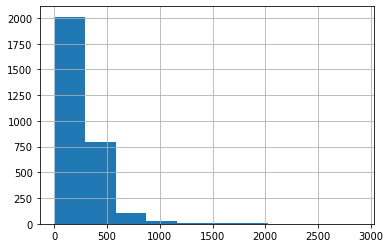

In [173]:
df_train['Sentences'].apply(len).hist()

In [174]:
MAXLEN = 300

In [175]:
from keras.utils import pad_sequences

In [176]:
def encoded(X):
  x_new = []
  for sent in X:
    te = []
    for word in sent.split():
      try:
        te.append(word2idx[word])
      except:
        te.append(word2idx["UNK"])
    x_new.append(te)
  x_new = pad_sequences(x_new,maxlen=MAXLEN,padding='post',truncating = 'post',value = word2idx['PAD'])
  return x_new

In [177]:
X_train[0]

'ảnh chụp từ hôm_qua đi chơi với gia_đình và nhà họ_hàng đang sống tại xài gòn hôm_qua đi ăn trưa muộn ai cũng đói hết nên lúc có đồ_ăn là nhào vô ăn_liền bởi_vậy mới quên chụp các phần gọi thêm với nước_mắm chỉ chụp món chính thôi đói quá nên không biết đánh_giá đồ ăn kiểu gì luôn tiêu_cực tiêu_cực tiêu_cực chọn cái này vì thấy nó lạ với tui '

In [178]:
X_train_encoded = encoded(X_train)
X_dev_encoded = encoded(X_dev)
X_test_encoded = encoded(X_test)

## Model

In [179]:
from keras.initializers import Constant
from keras.layers import Dense,Input,GlobalAveragePooling1D ,concatenate,Dropout,GRU,Bidirectional,TimeDistributed, Embedding, Attention, LSTM,Convolution1D,MaxPooling1D,Flatten,SpatialDropout1D,LeakyReLU,AveragePooling1D,MultiHeadAttention,GlobalMaxPooling1D
from keras.models import Model
from transformers import TFAutoModel
from keras.optimizers import Adamax
from keras.regularizers import L1,L2

In [180]:
!pip install keras-self-attention


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [182]:
from keras_self_attention import SeqSelfAttention


In [181]:
df_test['Sentences'].apply(len).mean()

759.322

In [192]:
input = Input(shape = (MAXLEN,) )
embedding = Embedding(input_dim = num_word,output_dim = embedding_dim, embeddings_initializer = Constant(embedding_matrix),mask_zero = True) (input)

bi_lstm = Bidirectional(LSTM(512,activation = LeakyReLU(0.4),return_sequences = True)) (embedding)
attention = SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,attention_width=9,
                       attention_activation='sigmoid') (bi_lstm)
convo1d = Convolution1D(512,kernel_size = 3,padding = 'same',activation = LeakyReLU(0.4)) (attention)
maxpool = MaxPooling1D (3,padding='same',strides=1) (convo1d)

concate = concatenate([
    bi_lstm,maxpool
]) 

globalmaxpool = GlobalMaxPooling1D () (concate)
dense1 = Dense(512,activation = LeakyReLU(0.4)) (globalmaxpool)
dropout = Dropout(0.1) (dense1)

output = concatenate([
    Dense(4,activation = 'softmax') (dropout)
    for x in df.columns[1:]
],axis=-1)



In [193]:
model_lstm = Model(input,output)
model_lstm.summary() 

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 300)]        0           []                               
                                                                                                  
 embedding_9 (Embedding)        (None, 300, 100)     158750700   ['input_10[0][0]']               
                                                                                                  
 bidirectional_9 (Bidirectional  (None, 300, 1024)   2510848     ['embedding_9[0][0]']            
 )                                                                                                
                                                                                                  
 seq_self_attention_9 (SeqSelfA  (None, 300, 1024)   1048577     ['bidirectional_9[0][0]']  

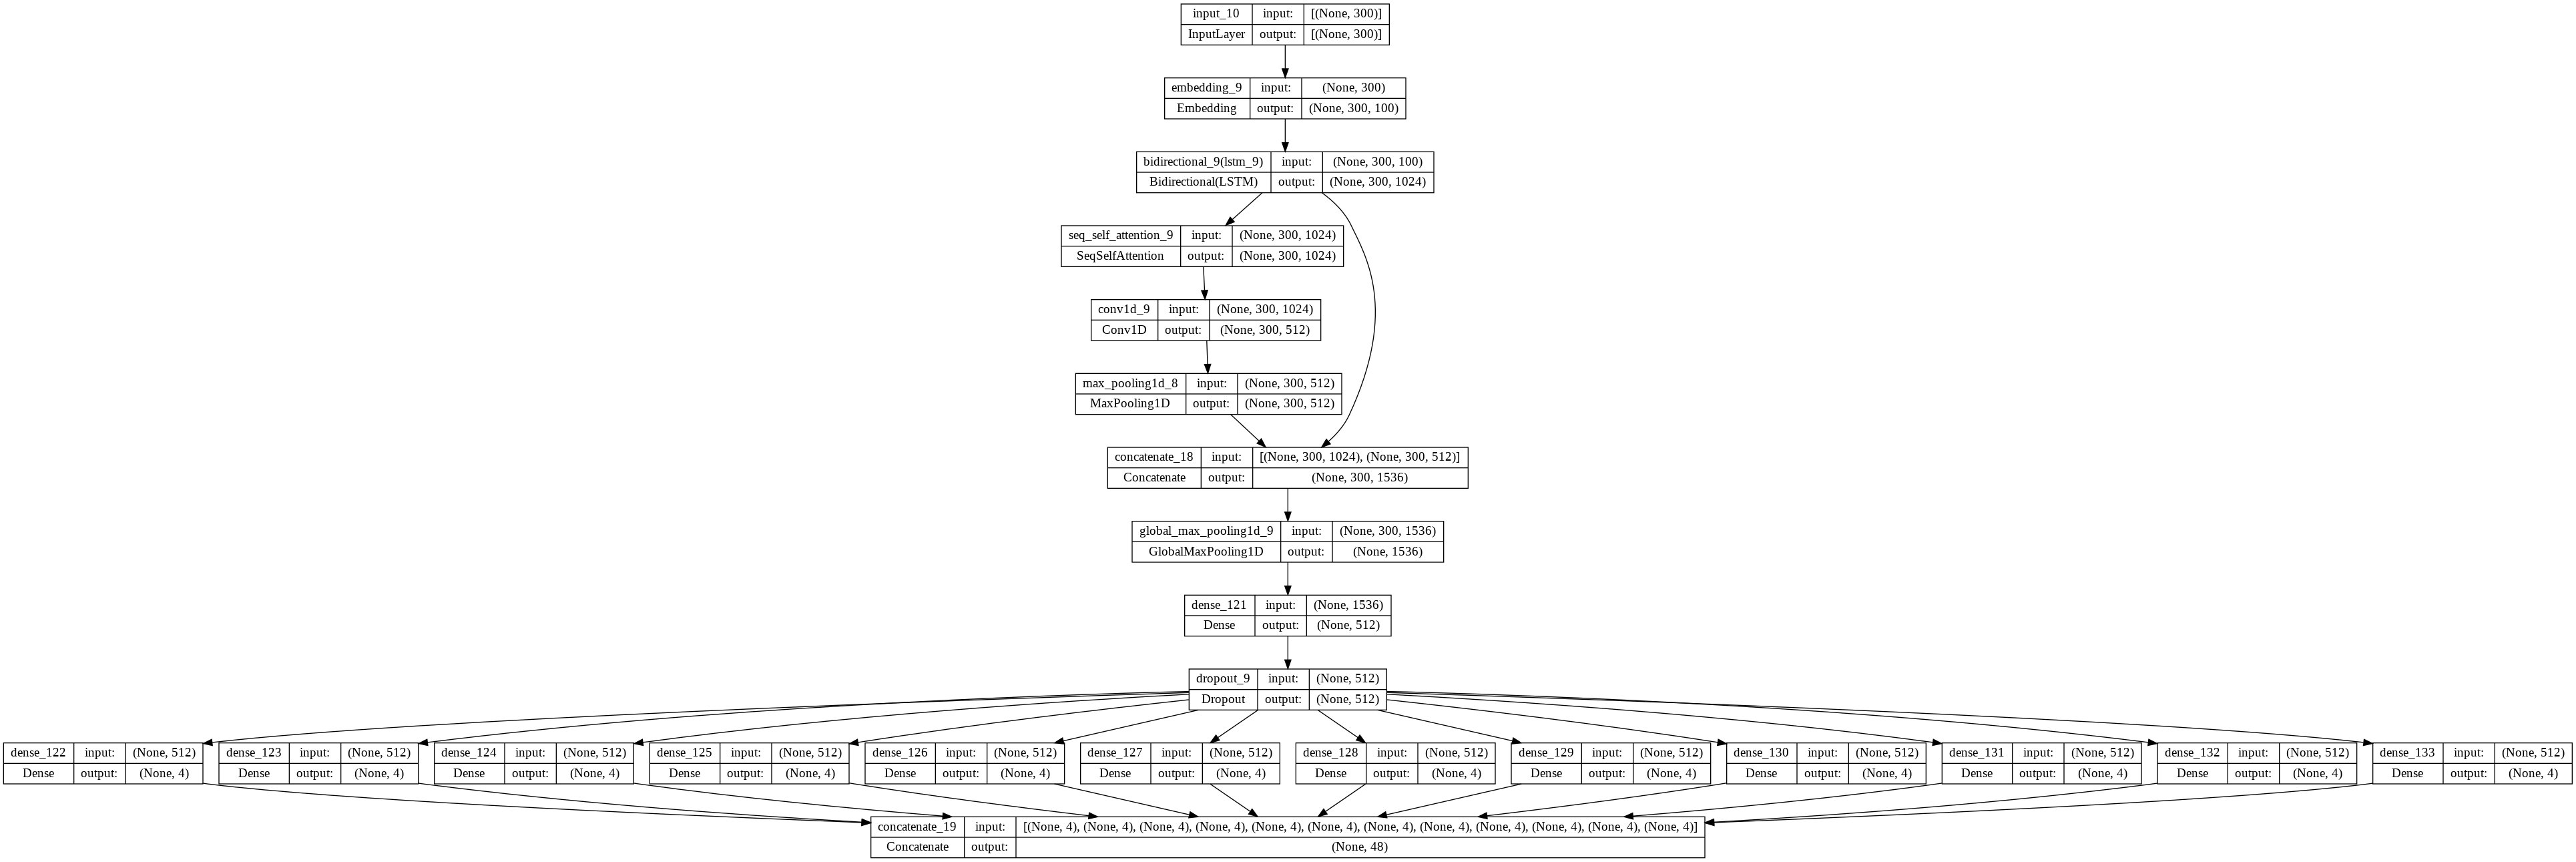

In [194]:
from keras.utils.vis_utils import plot_model
plot_model(model_lstm,  show_shapes=True, show_layer_names=True)

In [186]:
from official.nlp import optimization
num_train_steps = 50 * 30
optimizer = optimization.create_optimizer(
    init_lr = 3e-5, 
    num_train_steps = num_train_steps, 
    num_warmup_steps = num_train_steps // 10
)
type(optimizer)

official.modeling.optimization.legacy_adamw.AdamWeightDecay

In [195]:
model_lstm.compile(optimizer = optimizer,loss = 'binary_crossentropy')


In [188]:
y_train_lstm = np.array([y.flatten() for y in y_train])
y_dev_lstm = np.array([y.flatten() for y in y_dev])
y_test_lstm = np.array([y.flatten() for y in y_test])

In [190]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# model_lstm.fit(
#     X_train_encoded,
#     y_train_lstm,
#     validation_data = (X_dev_encoded,y_dev_lstm),
#     epochs = 60,
#     callbacks = callback
# )

In [196]:
model_lstm.load_weights("/content/drive/MyDrive/NLP/do an/BiLSTM_weights.h5")

# Pretrained Model

## Tokenizer

In [242]:
PRETRAINED_MODEL = "vinai/phobert-base"

In [243]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_MODEL)


Downloading:   0%|          | 0.00/557 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/895k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [244]:
tokenizer.max_model_input_sizes

{'vinai/phobert-base': 256, 'vinai/phobert-large': 256}

In [245]:
def toTokenize(dts):
    clean_text = list(map(TextNormalized, dts['Sentences']))
    return tokenizer(clean_text,truncation=True,padding='max_length',max_length=tokenizer.model_max_length)

In [246]:
tokenize_dataset = dataset.map(toTokenize,batched=True)


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [247]:
tokenize_dataset

DatasetDict({
    train: Dataset({
        features: ['Sentences', 'RESTAURANT#GENERAL', 'RESTAURANT#PRICES', 'RESTAURANT#MISCELLANEOUS', 'FOOD#PRICES', 'FOOD#QUALITY', 'FOOD#STYLE&OPTIONS', 'DRINKS#PRICES', 'DRINKS#QUALITY', 'DRINKS#STYLE&OPTIONS', 'AMBIENCE#GENERAL', 'SERVICE#GENERAL', 'LOCATION#GENERAL', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2961
    })
    dev: Dataset({
        features: ['Sentences', 'RESTAURANT#GENERAL', 'RESTAURANT#PRICES', 'RESTAURANT#MISCELLANEOUS', 'FOOD#PRICES', 'FOOD#QUALITY', 'FOOD#STYLE&OPTIONS', 'DRINKS#PRICES', 'DRINKS#QUALITY', 'DRINKS#STYLE&OPTIONS', 'AMBIENCE#GENERAL', 'SERVICE#GENERAL', 'LOCATION#GENERAL', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1290
    })
    test: Dataset({
        features: ['Sentences', 'RESTAURANT#GENERAL', 'RESTAURANT#PRICES', 'RESTAURANT#MISCELLANEOUS', 'FOOD#PRICES', 'FOOD#QUALITY', 'FOOD#STYLE&OPTIONS', 'DRINKS#PRICES', 'DRINKS#QUALITY', 'DRINKS#STYLE&OPTIONS', 'AM

In [248]:
print(tokenize_dataset['train']['input_ids'][0])

[0, 284, 690, 39, 2402, 57, 379, 15, 161, 6, 69, 6093, 52, 235, 35, 8480, 56669, 2402, 57, 203, 2018, 2827, 277, 32, 3442, 351, 77, 219, 10, 4036, 8, 13419, 4819, 25253, 11966, 60, 1323, 690, 9, 230, 328, 143, 15, 4909, 66, 690, 526, 159, 886, 3442, 204, 77, 17, 55, 375, 779, 203, 931, 148, 236, 2259, 2259, 2259, 437, 224, 23, 90, 108, 231, 1410, 15, 6265, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Tensorflow

In [249]:
from tensorflow.data import Dataset

In [250]:
MAX_SEQUENCE_LENGTH = tokenizer.model_max_length


In [251]:
MAX_SEQUENCE_LENGTH = tokenizer.model_max_length
BATCH_SIZE = 1
# Traditionally, the steps per epoch is calculated as train_length // batch_size
STEPS_PER_EPOCH = len(dataset['train']) // BATCH_SIZE
VALIDATION_STEPS = len(dataset['dev']) // BATCH_SIZE
EPOCHS = 30

In [252]:
tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']

In [253]:
def toPretrainedFormat(tokenize):
    return tokenize.remove_columns(list(tokenize.features)[:-len(tokenizer.model_input_names)]).with_format('tensorflow')


In [254]:
def preprocess_tensor_dataset(tokenizer,tokenize_data,y,batch_size):
    ds = toPretrainedFormat(tokenize_data)
    features = {fea:ds[fea] for fea in tokenizer.model_input_names}
    y = y.reshape(len(y),-1)
    
    tf_data = Dataset.from_tensor_slices((features,y))
    return tf_data.batch(batch_size)

In [255]:
train_tf = preprocess_tensor_dataset(tokenizer,tokenize_dataset['train'],y_train,BATCH_SIZE)
dev_tf = preprocess_tensor_dataset(tokenizer,tokenize_dataset['dev'],y_dev,BATCH_SIZE)
test_tf = preprocess_tensor_dataset(tokenizer,tokenize_dataset['test'],y_test,BATCH_SIZE)

In [256]:
for i in train_tf.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(1, 256), dtype=int64, numpy=
array([[    0,   284,   690,    39,  2402,    57,   379,    15,   161,
            6,    69,  6093,    52,   235,    35,  8480, 56669,  2402,
           57,   203,  2018,  2827,   277,    32,  3442,   351,    77,
          219,    10,  4036,     8, 13419,  4819, 25253, 11966,    60,
         1323,   690,     9,   230,   328,   143,    15,  4909,    66,
          690,   526,   159,   886,  3442,   204,    77,    17,    55,
          375,   779,   203,   931,   148,   236,  2259,  2259,  2259,
          437,   224,    23,    90,   108,   231,  1410,    15,  6265,
            2,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,

## Fine tuning

In [257]:
def createModel():
    input_ids = Input(shape = (MAX_SEQUENCE_LENGTH),name = 'input_ids',dtype = np.int32)
    token_type_ids = Input(shape = (MAX_SEQUENCE_LENGTH),name = 'token_type_ids',dtype = np.int32)
    attention_mask = Input(shape = (MAX_SEQUENCE_LENGTH),name = 'attention_mask',dtype = np.int32)

    inputs = [input_ids,token_type_ids,attention_mask]

    model = TFAutoModel.from_pretrained(PRETRAINED_MODEL, output_hidden_states = 1)
    model_output = model(inputs)
    model_hidden_state = model_output.hidden_states

  #In their paper, BERT gets the best results by concatenating the last four layers
    concatenate_model_output = concatenate(
        tuple([model_hidden_state[i] for i in range(-4,0)]), 
        axis = -1) [:, 0, :]
    
    drop_out = Dropout(0.2) (concatenate_model_output)
    output = concatenate([
        Dense(4,activation = 'softmax') (drop_out)
        for x in df.columns[1:]
    ],axis=-1)
    
    model = Model(inputs = inputs,outputs=output)
    model.summary()
    return model



In [258]:
from official.nlp import optimization
num_train_steps = STEPS_PER_EPOCH * EPOCHS
optimizer = optimization.create_optimizer(
    init_lr = 1e-5, 
    num_train_steps = num_train_steps, 
    num_warmup_steps = num_train_steps // 10
)
type(optimizer)

official.modeling.optimization.legacy_adamw.AdamWeightDecay

In [259]:
model = createModel()
model.compile(optimizer = optimizer,loss = 'binary_crossentropy')


Downloading:   0%|          | 0.00/740M [00:00<?, ?B/s]

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  134998272  ['input_ids[0][0]',              
 el)                            thPoolingAndCrossAt               'token_type_ids[0][0]',  

In [260]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# model.fit(
#     train_tf,
#     validation_data = dev_tf,
#     validation_steps = VALIDATION_STEPS,
#     steps_per_epoch = STEPS_PER_EPOCH,
#     epochs = EPOCHS,
#     callbacks = callback
# )

In [262]:
model.load_weights("/content/drive/MyDrive/NLP/do an/Phobert_base_weights.h5")

# Evaluate Test

In [263]:
y_pred = model.predict(test_tf,batch_size=BATCH_SIZE)
y_pred

500/500 [==============================] - 22s 37ms/step


array([[1.77321315e-01, 3.31769250e-02, 3.94641124e-02, ...,
        8.38049948e-02, 1.87682062e-02, 6.56031072e-02],
       [1.52551215e-02, 2.45691370e-03, 3.02507170e-03, ...,
        7.85878599e-01, 2.68681031e-02, 1.69767857e-01],
       [1.23165539e-02, 8.62919446e-03, 9.46844928e-03, ...,
        2.59247292e-02, 8.57148133e-03, 4.14420292e-02],
       ...,
       [5.96416276e-03, 3.42714228e-03, 8.54301173e-03, ...,
        8.93959403e-02, 4.80856039e-02, 4.50634509e-02],
       [3.08086634e-01, 8.52371333e-04, 1.92638938e-04, ...,
        2.80449865e-04, 3.41383333e-04, 1.54847302e-03],
       [2.09987676e-03, 2.30300939e-03, 7.48646737e-04, ...,
        1.71454623e-02, 6.68944325e-03, 1.69835731e-01]], dtype=float32)

In [264]:
def predict(model,input,batch_size = 1):
    y_pred = model.predict(input,batch_size = batch_size)
    return np.argmax(y_pred.reshape(len(y_pred),-1,4),axis=-1)

In [265]:
def printAbsaFormat(polarity,absa):
    i = 0
    for po in polarity:
        print(f"Sentences {i}")
        for a,p in zip(absa,po):
            if p != 'None':
                print(a,"=>",p)
        i+=1

In [266]:
absa = df_train.columns[1:]
replace = {0:'None', 1: "Neural", 2: "Negative", 3: "Positive"}

In [267]:
y_test_pred = predict(model,test_tf,BATCH_SIZE)
polarity_test = np.vectorize(lambda x: replace[x]) (y_test_pred)

500/500 [==============================] - 18s 37ms/step


In [268]:
printAbsaFormat(polarity_test,absa,)

Sentences 0
RESTAURANT#GENERAL => Positive
FOOD#PRICES => Neural
FOOD#QUALITY => Positive
FOOD#STYLE&OPTIONS => Positive
DRINKS#PRICES => Positive
DRINKS#QUALITY => Positive
DRINKS#STYLE&OPTIONS => Positive
Sentences 1
RESTAURANT#GENERAL => Positive
FOOD#PRICES => Neural
FOOD#QUALITY => Positive
FOOD#STYLE&OPTIONS => Positive
LOCATION#GENERAL => Neural
Sentences 2
RESTAURANT#GENERAL => Positive
RESTAURANT#PRICES => Positive
FOOD#QUALITY => Positive
FOOD#STYLE&OPTIONS => Positive
DRINKS#QUALITY => Positive
DRINKS#STYLE&OPTIONS => Positive
Sentences 3
RESTAURANT#GENERAL => Positive
FOOD#PRICES => Positive
FOOD#QUALITY => Positive
FOOD#STYLE&OPTIONS => Positive
DRINKS#PRICES => Positive
DRINKS#STYLE&OPTIONS => Positive
AMBIENCE#GENERAL => Positive
SERVICE#GENERAL => Positive
LOCATION#GENERAL => Neural
Sentences 4
FOOD#PRICES => Positive
FOOD#QUALITY => Positive
FOOD#STYLE&OPTIONS => Positive
AMBIENCE#GENERAL => Positive
SERVICE#GENERAL => Positive
Sentences 5
RESTAURANT#GENERAL => Positiv

# Random Sentences

## Pretrained

In [274]:
input = 'Cơm chiên không tệ, nhân viên không nhiệt tình, quán khá chật và nóng'
input_token = tokenizer(TextNormalized(input),truncation=True,padding='max_length',max_length=tokenizer.model_max_length)

In [275]:
features = {i : [[input_token[i]]] for i in tokenizer.model_input_names}

In [276]:
X = Dataset.from_tensor_slices(features)

In [277]:
pred = predict(model,X,1)
polarity = np.vectorize(lambda x: replace[x]) (pred)

1/1 [==============================] - 0s 54ms/step


In [278]:
printAbsaFormat(polarity,absa)

Sentences 0
FOOD#QUALITY => Positive
AMBIENCE#GENERAL => Neural
SERVICE#GENERAL => Negative


## LSTM

In [281]:
input = "Thịt gà ngon, nhân viên không thân thiện, quán nằm sâu trong hẻm khá khó tìm, không gian quán nóng nực"
input = TextNormalized(input)
input

'thịt gà ngon nhân_viên không thân_thiện quán nằm sâu trong hẻm khá khó tìm không_gian quán nóng_nực'

In [282]:
te = []
for i in input.split():
  try:
    te.append(word2idx[i])
  except:
    te.append(word2idx['UNK'])
te = pad_sequences([te],maxlen=MAXLEN,padding='post',truncating = 'post')
print(te)

[[  687  1091  1281   641    15  2881   940   335   800    10  5234   278
    354   237  1123   940 15809     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

In [284]:
y_pred_lstm = model_lstm.predict(te,1)
print(y_pred_lstm)


1/1 [==============================] - 1s 825ms/step
[[0.71822184 0.02195835 0.01788952 0.24193026 0.8986796  0.03349181
  0.01227382 0.05555471 0.9303234  0.02039962 0.02288043 0.02639657
  0.67083055 0.1409025  0.03247088 0.15579605 0.17060342 0.15129596
  0.0366985  0.64140207 0.60112023 0.07615225 0.05929755 0.26342997
  0.9626209  0.01197794 0.00641564 0.01898546 0.93513596 0.01326886
  0.01377799 0.03781721 0.9547066  0.00640413 0.0052526  0.03363673
  0.7600198  0.04547424 0.03917573 0.15533026 0.7728321  0.03107787
  0.03802723 0.15806274 0.8897832  0.05831909 0.02520312 0.02669458]]


In [285]:
y_pred_lstm = np.argmax(y_pred_lstm.reshape(-1,4),axis=-1)
polarity_test = np.vectorize(lambda x: replace[x]) (y_pred_lstm)


In [286]:
printAbsaFormat([polarity_test],absa)

Sentences 0
FOOD#QUALITY => Positive


In [ ]:
y_pred_lstm = predict(model_lstm,X_test_encoded,1)
polarity_test = np.vectorize(lambda x: replace[x]) (y_pred_lstm)

In [ ]:
y_pred_lstm[0]

In [ ]:
printAbsaFormat(polarity_test,absa,)

# Bảng kết quả đánh giá

In [287]:
from sklearn.metrics import classification_report


## Polarity 

In [289]:
y_test = np.argmax(y_test,axis=-1)
y_test

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [3, 0, 0, ..., 3, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [3, 0, 0, ..., 3, 0, 0]])

In [290]:
y_test_polarity = np.vectorize(lambda x: replace[x]) (y_test)
y_pred_polarity = np.vectorize(lambda x: replace[x]) (y_test_pred)

In [291]:
print(classification_report(y_test_polarity.flatten(),y_pred_polarity.flatten()))

              precision    recall  f1-score   support

    Negative       0.49      0.13      0.20       159
      Neural       0.59      0.30      0.40       591
        None       0.85      0.88      0.87      3581
    Positive       0.67      0.79      0.73      1669

    accuracy                           0.78      6000
   macro avg       0.65      0.52      0.55      6000
weighted avg       0.77      0.78      0.76      6000



## Aspect

In [292]:
aspect_test = []
aspect_pred = []

for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        if y_test[i][j] != 0:
            aspect_test.append(absa[j])
        else:
            aspect_test.append('')

        if y_test_pred[i][j] != 0:
            aspect_pred.append(absa[j])
        else:
            aspect_pred.append('')


In [293]:
print(classification_report(aspect_test,aspect_pred))

                          precision    recall  f1-score   support

                               0.85      0.88      0.87      3581
        AMBIENCE#GENERAL       0.88      0.77      0.82       255
           DRINKS#PRICES       0.85      0.14      0.25        76
          DRINKS#QUALITY       0.77      0.38      0.51        71
    DRINKS#STYLE&OPTIONS       0.60      0.39      0.47        46
             FOOD#PRICES       0.85      0.92      0.88       331
            FOOD#QUALITY       0.92      0.99      0.95       457
      FOOD#STYLE&OPTIONS       0.90      0.90      0.90       403
        LOCATION#GENERAL       0.83      0.79      0.81       179
      RESTAURANT#GENERAL       0.54      0.91      0.68       223
RESTAURANT#MISCELLANEOUS       0.00      0.00      0.00       130
       RESTAURANT#PRICES       0.38      0.22      0.28        73
         SERVICE#GENERAL       0.85      0.80      0.82       175

                accuracy                           0.84      6000
        

## Aspect + Polarity

In [294]:
aspect_pola_test = []
aspect_pola_pred = []

for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        aspect_pola_test.append(absa[j] + ',' + y_test_polarity[i][j])
        aspect_pola_pred.append(absa[j] + ',' + y_pred_polarity[i][j])


In [295]:
print(classification_report(aspect_pola_test,aspect_pola_pred))

                                   precision    recall  f1-score   support

        AMBIENCE#GENERAL,Negative       0.00      0.00      0.00        26
          AMBIENCE#GENERAL,Neural       0.43      0.31      0.36        48
            AMBIENCE#GENERAL,None       0.79      0.89      0.84       245
        AMBIENCE#GENERAL,Positive       0.78      0.81      0.79       181
           DRINKS#PRICES,Negative       0.00      0.00      0.00         3
             DRINKS#PRICES,Neural       0.67      0.04      0.08        45
               DRINKS#PRICES,None       0.87      1.00      0.93       424
           DRINKS#PRICES,Positive       0.20      0.07      0.11        28
          DRINKS#QUALITY,Negative       0.00      0.00      0.00         6
            DRINKS#QUALITY,Neural       0.00      0.00      0.00        11
              DRINKS#QUALITY,None       0.91      0.98      0.94       429
          DRINKS#QUALITY,Positive       0.54      0.35      0.43        54
    DRINKS#STYLE&OPTIONS

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
